Plik zawierający każdą dostępną transformację dla pojedynczego przekroju obrazu, zgodnie z kolejnością dostępną na stronie Albumentations:

https://albumentations.ai/docs/getting_started/transforms_and_targets/


Poniżej link do wyliczania średniej jasności z setu obrazów:

https://stackoverflow.com/questions/73350133/how-to-calculate-mean-and-standard-deviation-of-a-set-of-images

In [1]:
import albumentations as A
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

In [3]:
def multi_visualize(image, mask):
    fig = plt.figure(figsize=(10, 10))
    fig.add_subplot(2,2,1)
    plt.axis('off')
    plt.imshow(image)
    fig.add_subplot(2,2,2)
    plt.axis('off')
    plt.imshow(mask)

In [4]:
image = cv2.imread('35-image.jpg')
mask = cv2.imread('35-mask.png')
image = np.array(image)
mask = np.array(mask)

random.seed(0)

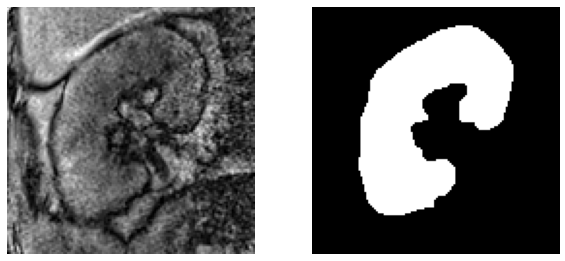

In [5]:
multi_visualize(image, mask)

___
# Transformacje pikselowe - angażujące tylko obrazy

## AdvancedBlur

Blur the input image using a Generalized Normal filter with a randomly selected parameters. This transform also adds multiplicative noise to generated kernel before convolution.

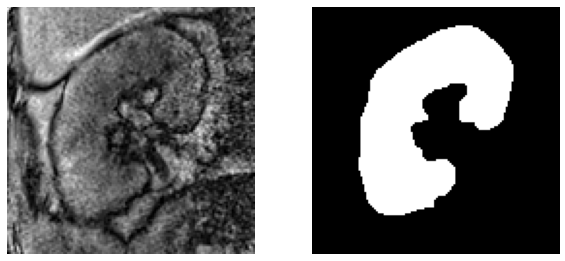

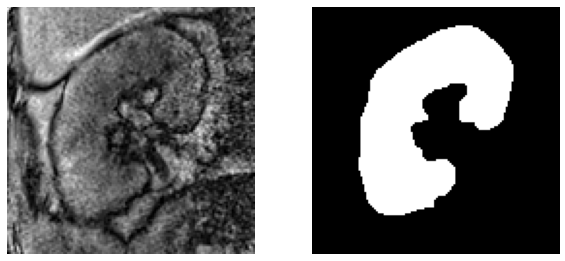

In [17]:
transform = A.AdvancedBlur(blur_limit=(3, 7), sigmaX_limit=(0.2, 1.0), sigmaY_limit=(0.2, 1.0), 
                           rotate_limit=90, beta_limit=(0.5, 8.0), noise_limit=(0.9, 1.1), always_apply=False, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## CLAHE - Contrast Limited Adaptive Histogram Equalization

Apply Contrast Limited Adaptive Histogram Equalization to the input image.

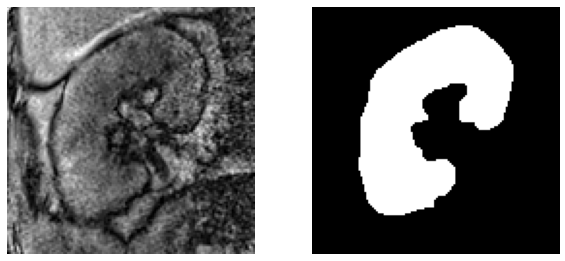

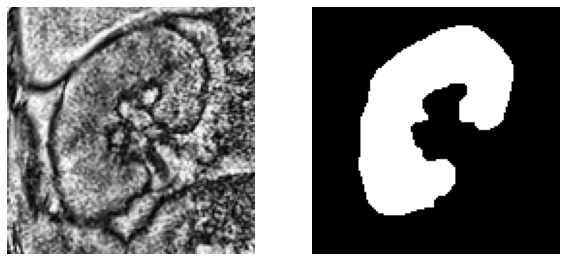

In [18]:
transform = A.CLAHE(clip_limit=4.0, tile_grid_size=(8, 8), p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## ColorJitter

Randomly changes the brightness, contrast, and saturation of an image. Compared to ColorJitter from torchvision, this transform gives a little bit different results because Pillow (used in torchvision) and OpenCV (used in Albumentations) transform an image to HSV format by different formulas. Another difference - Pillow uses uint8 overflow, but we use value saturation.

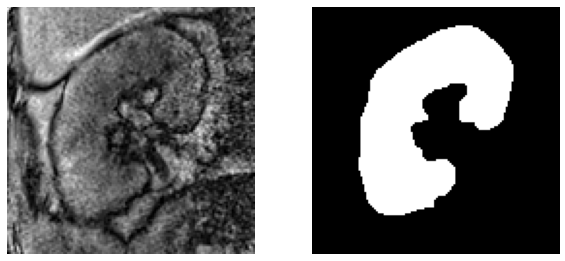

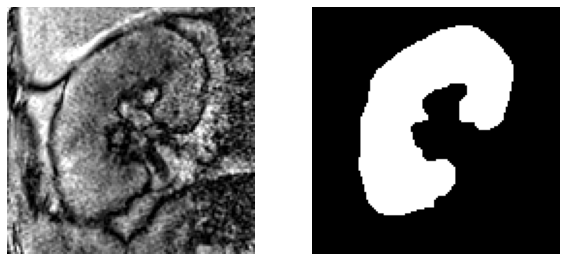

In [19]:
transform = A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Emboss

Emboss the input image and overlays the result with the original image.

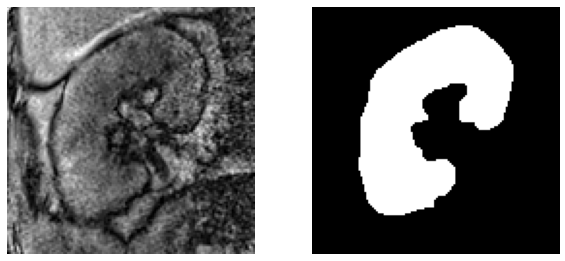

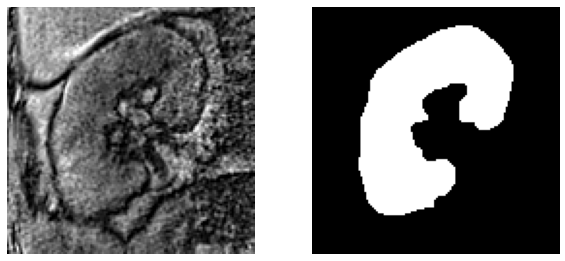

In [21]:
transform = A.Emboss (alpha=(0.2, 0.5), strength=(0.2, 0.7), p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Equalize

Equalize the image histogram.

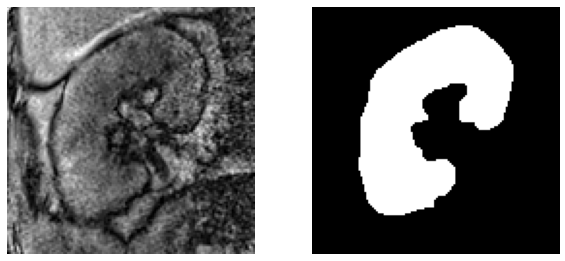

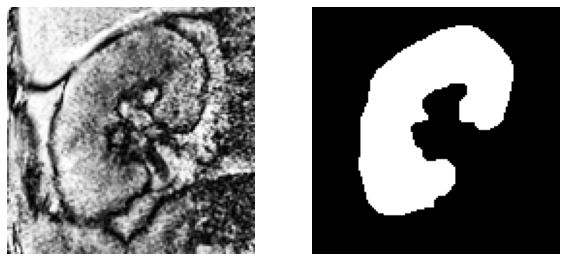

In [22]:
transform = A.Equalize (mode='cv', by_channels=True, mask=None, mask_params=(), p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Fancy PCA

Augment RGB image using FancyPCA from Krizhevsky's paper "ImageNet Classification with Deep Convolutional Neural Networks"

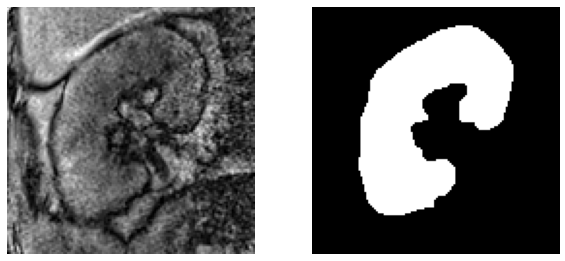

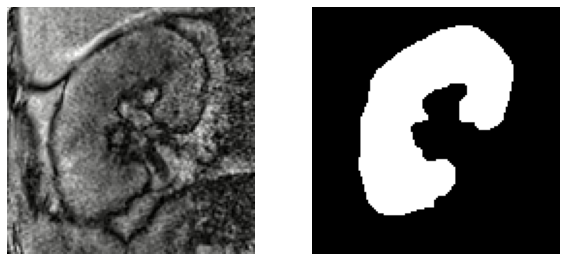

In [23]:
transform = A.FancyPCA (alpha=0.1, always_apply=False, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Gauss Noise

Apply gaussian noise to the input image.

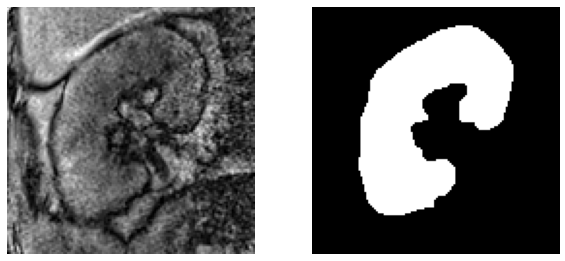

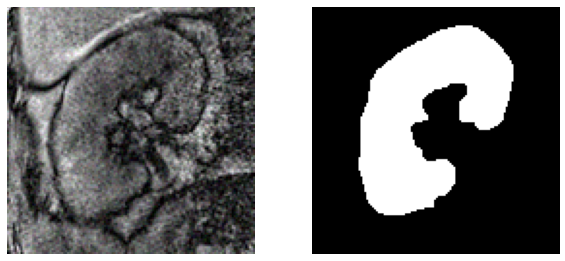

In [24]:
transform = A.GaussNoise (var_limit=(10.0, 50.0), mean=0, per_channel=True, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Gaussian Blur

Blur the input image using a Gaussian filter with a random kernel size.

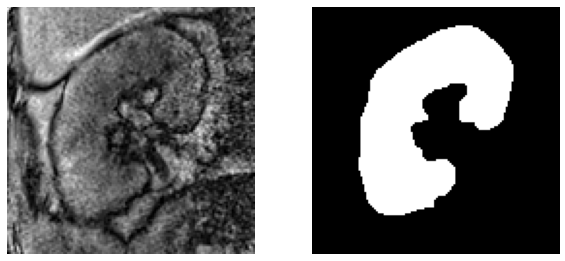

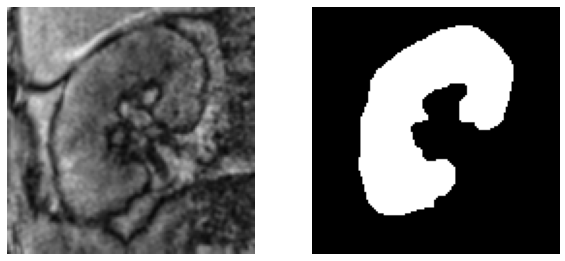

In [26]:
transform = A.GaussianBlur (blur_limit=(3, 3), sigma_limit=0, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## HueSaturationValue

Randomly change hue, saturation and value of the input image.

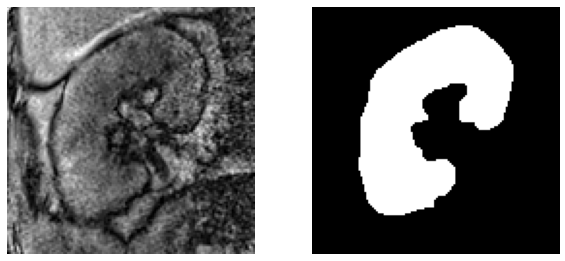

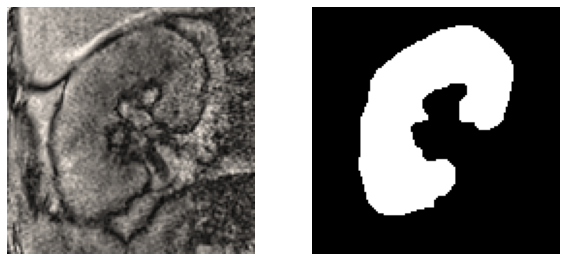

In [31]:
transform = A.HueSaturationValue (hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## ISONoise

Apply camera sensor noise.

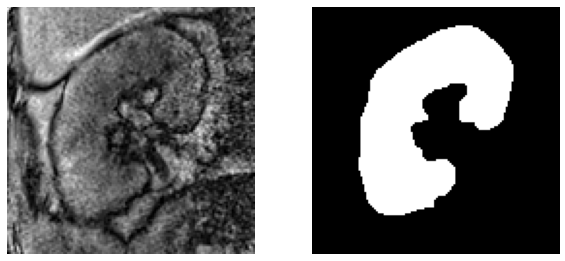

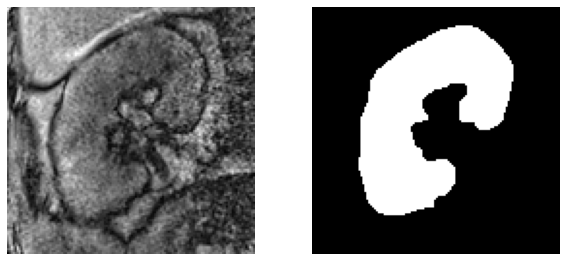

In [32]:
transform = A.ISONoise (color_shift=(0.01, 0.05), intensity=(0.1, 0.5), p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## MotionBlur

Apply motion blur to the input image using a random-sized kernel.

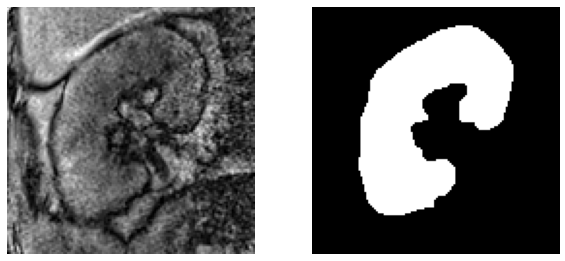

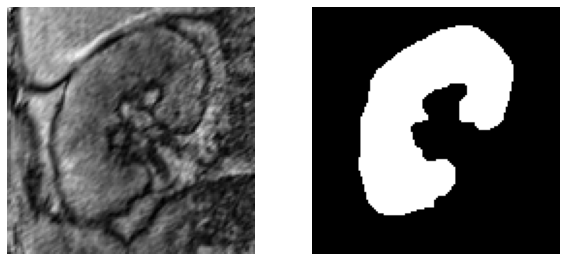

In [42]:
transform = A.MotionBlur (blur_limit=3, allow_shifted=True, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Zoom Blur

Apply zoom blur transform. See https://arxiv.org/abs/1903.12261.

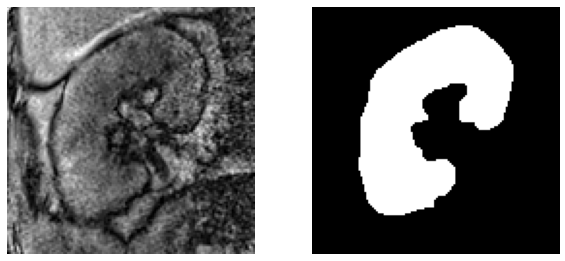

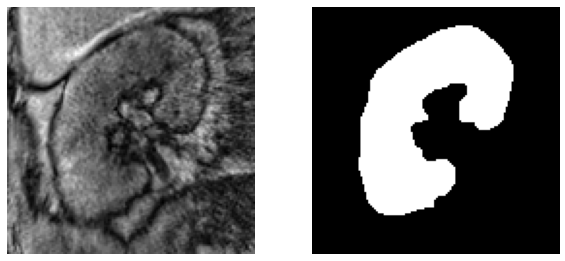

In [43]:
transform = A.ZoomBlur (max_factor=1.31, step_factor=(0.01, 0.03), p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Multiplicative Noise

Multiply image to random number or array of numbers.

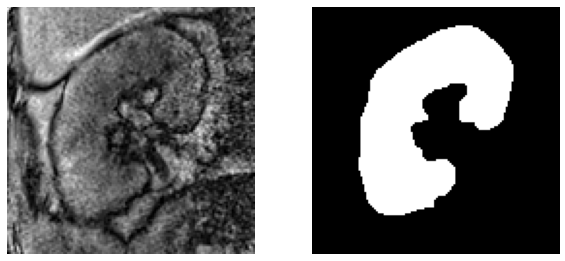

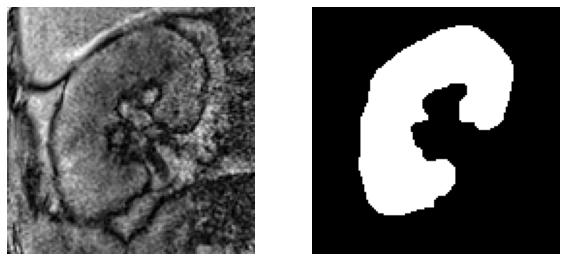

In [44]:
transform = A.MultiplicativeNoise (multiplier=(0.9, 1.1), per_channel=False, elementwise=False, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Posterize

Reduce the number of bits for each color channel.

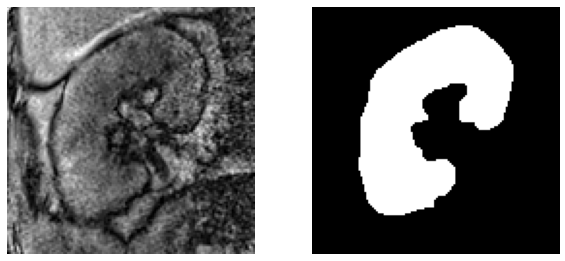

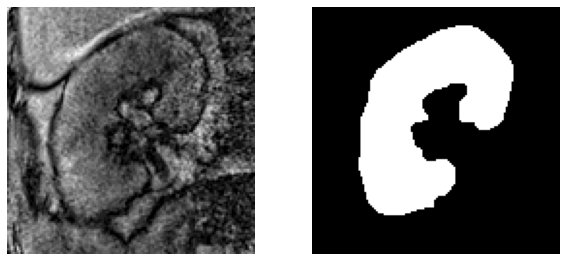

In [47]:
transform = A.Posterize (num_bits=4, always_apply=False, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Random Brightness Contrast

Randomly change brightness and contrast of the input image.

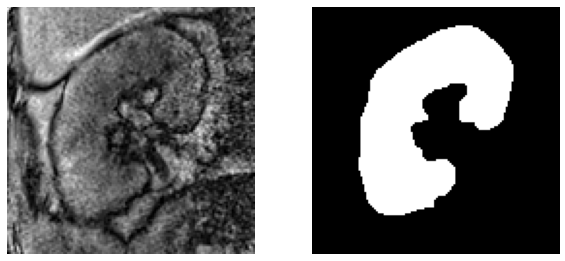

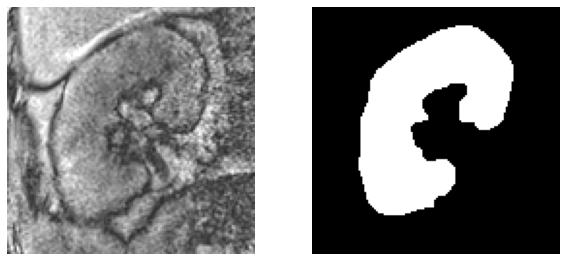

In [48]:
transform = A.RandomBrightnessContrast (brightness_limit=0.2, contrast_limit=0.2, brightness_by_max=True, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## RandomFog

Simulates fog for the image

From https://github.com/UjjwalSaxena/Automold--Road-Augmentation-Library

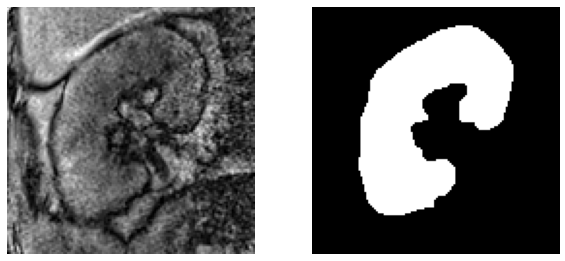

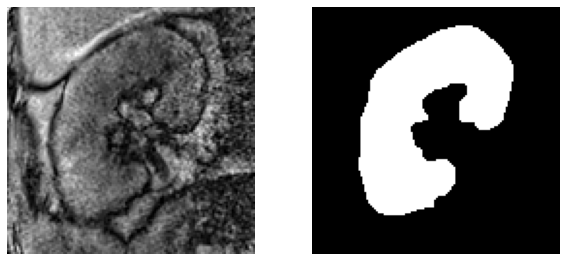

In [50]:
transform = A.RandomFog (fog_coef_lower=0.3, fog_coef_upper=1, alpha_coef=0.08, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Random Gamma

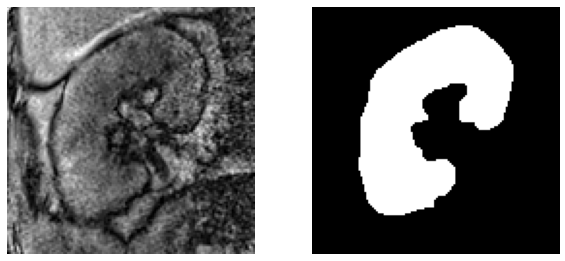

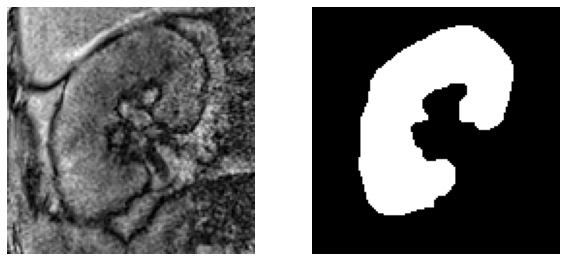

In [51]:
transform = A.RandomGamma (gamma_limit=(80, 120), eps=None, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Random Tone Curve

Randomly change the relationship between bright and dark areas of the image by manipulating its tone curve.

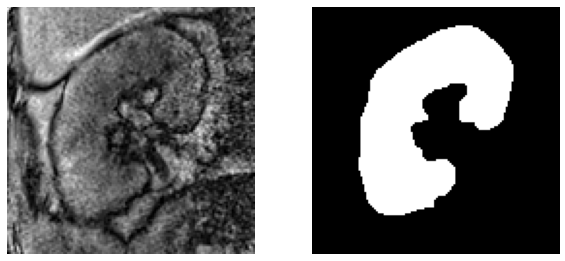

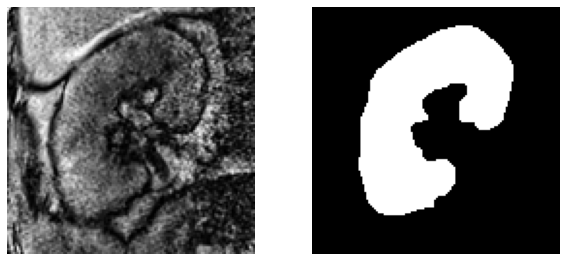

In [54]:
transform = A.RandomToneCurve (scale=0.1, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Sharpen

Sharpen the input image and overlays the result with the original image.

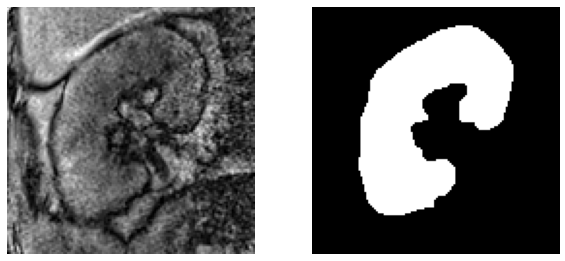

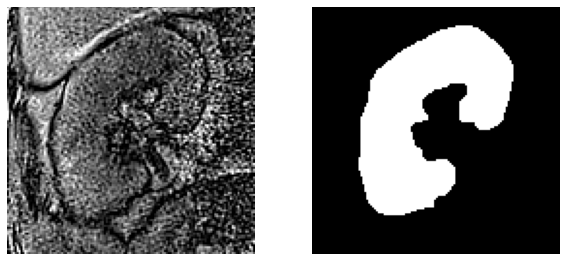

In [55]:
transform = A.Sharpen (alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Solarize

Invert all pixel values above a threshold.

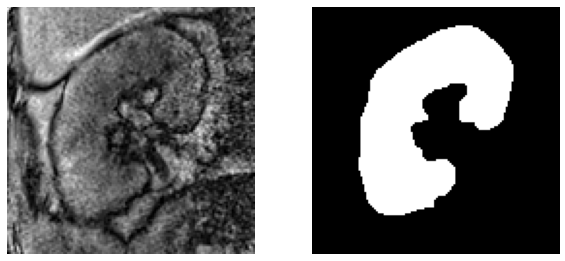

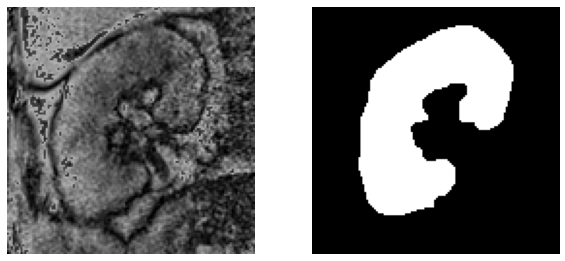

In [57]:
transform = A.Solarize (threshold=180, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Superpixels

Transform images partially/completely to their superpixel representation. This implementation uses skimage's version of the SLIC algorithm.

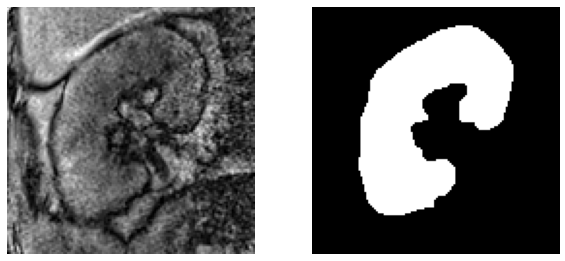

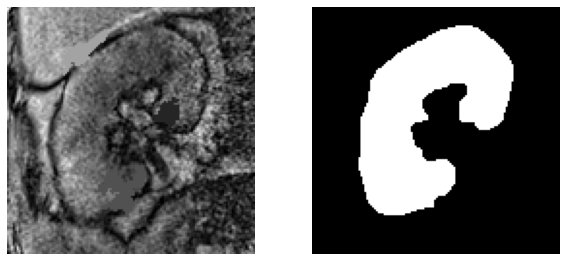

In [58]:
transform = A.Superpixels (p_replace=0.1, n_segments=100, max_size=128, interpolation=1, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Spatter

Apply spatter transform. It simulates corruption which can occlude a lens in the form of rain or mud.

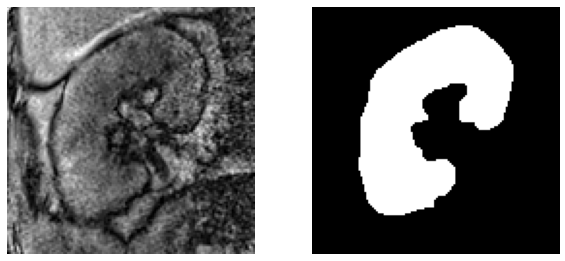

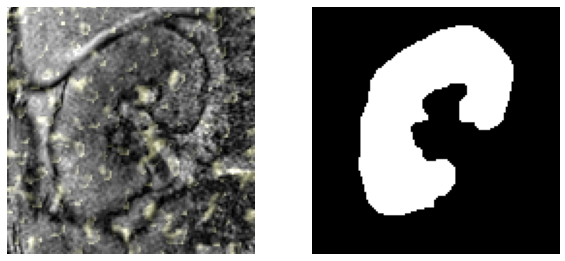

In [60]:
transform = A.Spatter (mean=0.65, std=0.3, gauss_sigma=2, cutout_threshold=0.68, intensity=0.6, mode='rain', p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

___
# Transformacje Geometryczne - angażujące też maski

## Affine

Augmentation to apply affine transformations to images. This is mostly a wrapper around the corresponding classes and functions in OpenCV.

Affine transformations involve:


- Translation ("move" image on the x-/y-axis)
- Rotation
- Scaling ("zoom" in/out)
- Shear (move one side of the image, turning a square into a trapezoid)

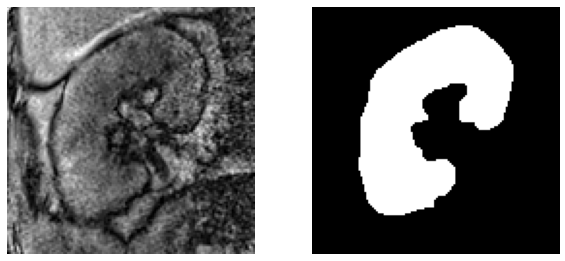

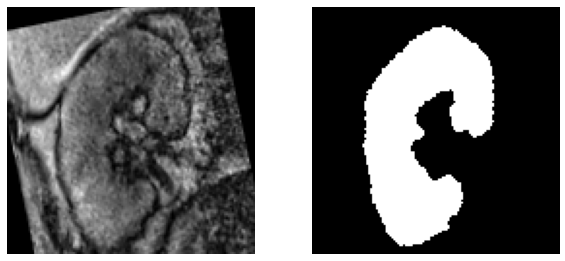

In [61]:
transform = A.Affine (scale=None, translate_percent=None, translate_px=None, rotate=None, shear=None, interpolation=1, mask_interpolation=0, cval=0, cval_mask=0, mode=0, fit_output=False, keep_ratio=False, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## CropAndPad

Crop and pad images by pixel amounts or fractions of image sizes. Cropping removes pixels at the sides (i.e. extracts a subimage from a given full image). Padding adds pixels to the sides (e.g. black pixels). This transformation will never crop images below a height or width of 1.

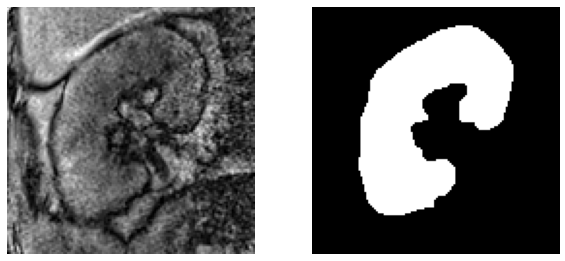

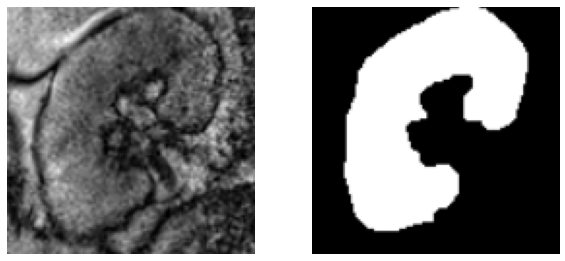

In [69]:
transform = A.CropAndPad (px=-10, percent=None, pad_mode=0, pad_cval=0, pad_cval_mask=0, keep_size=True, sample_independently=True, interpolation=1, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Elastic Transform

Elastic deformation of images as described in [Simard2003]_ (with modifications). Based on https://gist.github.com/ernestum/601cdf56d2b424757de5

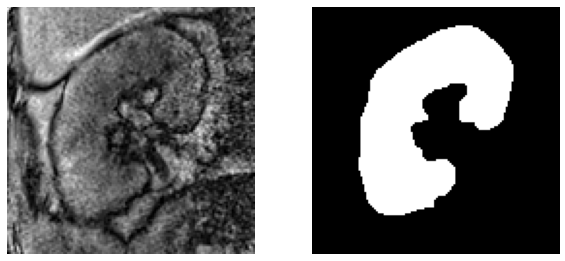

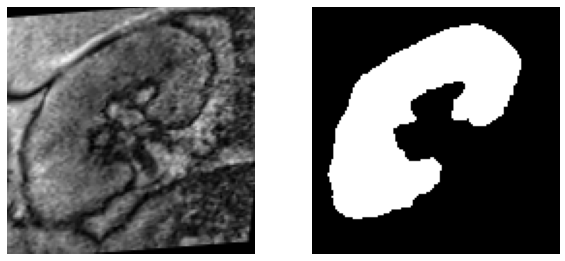

In [38]:
transform = A.ElasticTransform (alpha=1, sigma=15, alpha_affine=10, interpolation=1, border_mode=cv2.BORDER_CONSTANT, value=None, mask_value=None, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Flip

Flips image horizontally or vertically

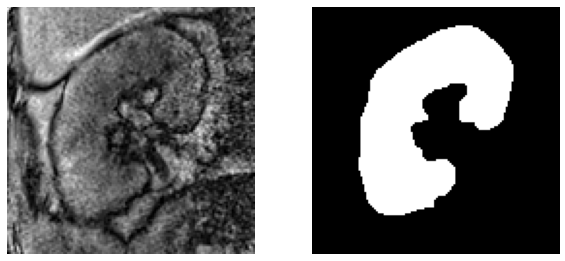

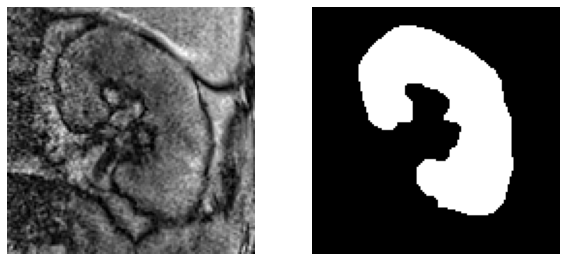

In [26]:
transform = A.HorizontalFlip (p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

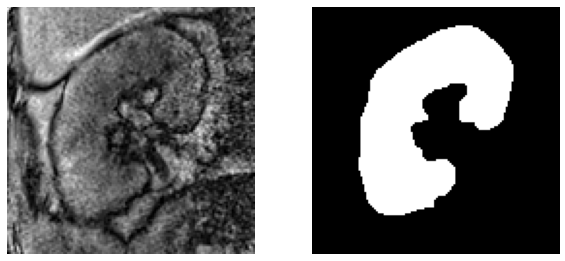

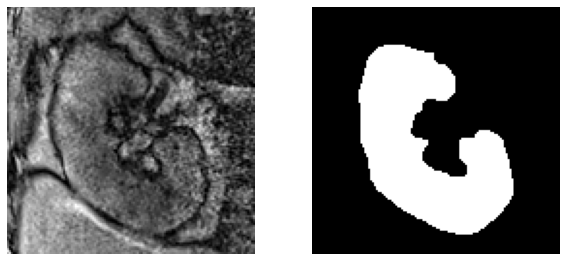

In [73]:
transform = A.VerticalFlip (p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Grid Distortion

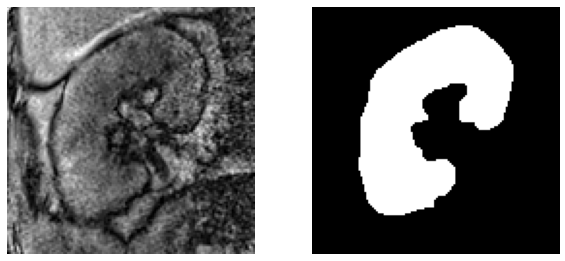

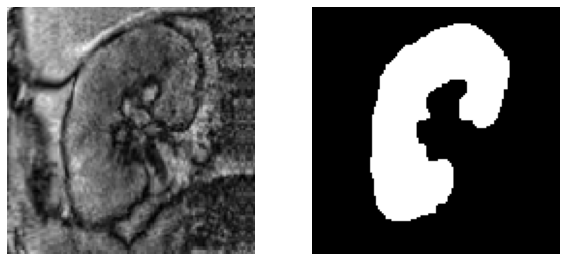

In [74]:
transform = A.GridDistortion (num_steps=5, distort_limit=0.3, interpolation=1, border_mode=4, value=None, mask_value=None, normalized=False,p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Perspective

Perform a random four point perspective transform of the input.

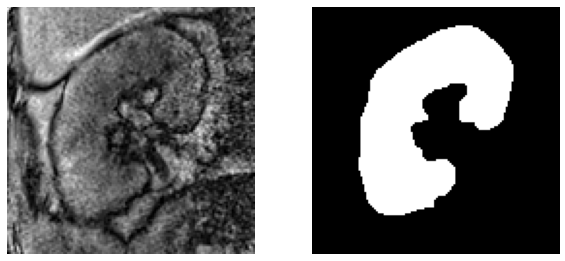

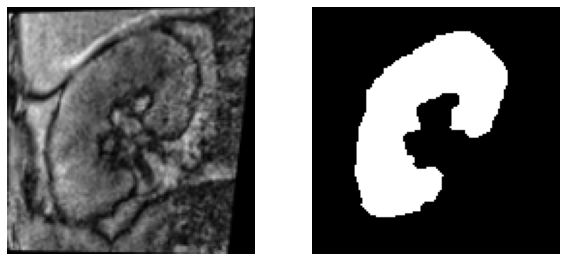

In [17]:
transform = A.Perspective (scale=(0.05, 0.1), keep_size=True, pad_mode=0, pad_val=0, mask_pad_val=0, fit_output=False, interpolation=1, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Rotate

Rotate the input by an angle selected randomly from the uniform distribution.

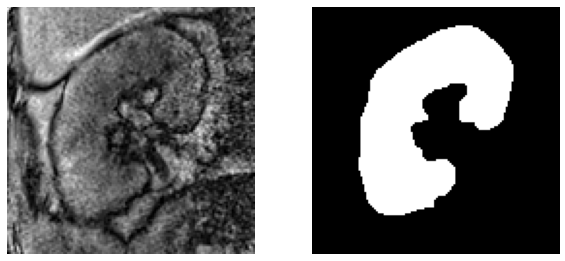

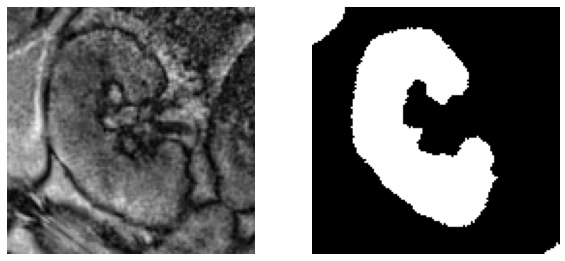

In [83]:
transform = A.Rotate (limit=90, interpolation=1, border_mode=4, value=None, mask_value=None, rotate_method='largest_box', crop_border=False, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## Safe Rotate

Rotate the input inside the input's frame by an angle selected randomly from the uniform distribution.

The resulting image may have artifacts in it. After rotation, the image may have a different aspect ratio, and after resizing, it returns to its original shape with the original aspect ratio of the image. For these reason we may see some artifacts.

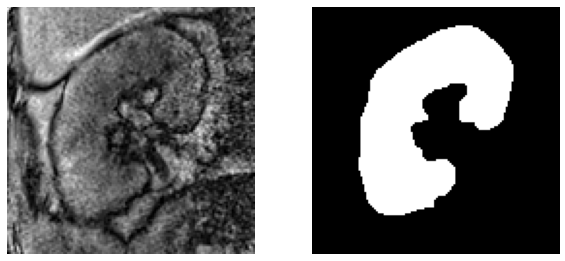

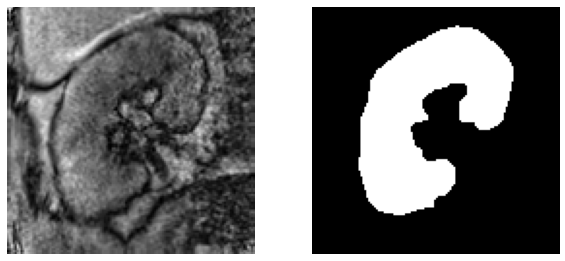

In [85]:
transform = A.SafeRotate (limit=90, interpolation=1, border_mode=cv2.BORDER_CONSTANT, value=None, mask_value=None, p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)

## ShiftScaleRotate

Randomly apply affine transforms: translate, scale and rotate the input.

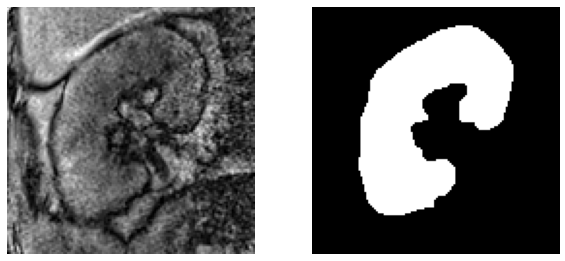

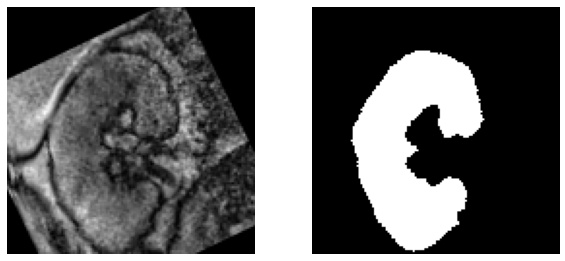

In [7]:
transform = A.ShiftScaleRotate (shift_limit=0.625, scale_limit=0.1, rotate_limit=45, interpolation=1, border_mode=cv2.BORDER_CONSTANT, value=None, mask_value=None, shift_limit_x=None, shift_limit_y=None, rotate_method='largest_box', p=1)
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
multi_visualize(image, mask)
multi_visualize(transformed_image, transformed_mask)